In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils import generate_normal_map
from matplotlib.colors import TwoSlopeNorm
%matplotlib widget
plt.ioff()

# DATA

In [8]:
data = np.load("data/runs/traj X 2025-02-02 17:18 (9.858s).npz", allow_pickle=True)

hm_states = data['hm_states']
vhl_mask = data['vhl_mask']
time = data['time'].item()
param = data["param"].item()

mask_center = ((vhl_mask.shape[0]-1) / 2, (vhl_mask.shape[1]-1) / 2) # (Y,X)

def global_coord(local_coords):
        return obj_pos[0] + local_coords[0], obj_pos[1] + local_coords[1]

In [3]:
IS_3D = False
SHOW_NM = False

# FIGURE & MAP

In [4]:
# Indices des height_maps à afficher
indices = [0, -1]  # Premier et dernier

# Calculer la plage commune pour la normalisation
vmin = min([hm_states[i][0].min() for i in indices])
vmax = max([hm_states[i][0].max() for i in indices])
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = "coolwarm"

# Créer une figure avec deux sous-graphiques côte à côte
FIG, AXES = plt.subplots(1, 2, figsize=(12, 7), subplot_kw={'projection': '3d'} if IS_3D else {})

AXES[0].set_title("Initial Height Map")
AXES[1].set_title("Final Height Map")

# Afficher le premier et le dernier height_map
for ax, idx in zip(AXES, indices):
    height_map = hm_states[idx][0]
    traj = np.array(hm_states[idx][1])
    if IS_3D:
        y = np.arange(height_map.shape[0])
        x = np.arange(height_map.shape[1])
        x_meshed, y_meshed = np.meshgrid(x, y)
        # Graphique 3D
        res = ax.plot_surface(x_meshed, y_meshed, height_map, cmap=cmap, norm=norm)
        
        if traj.size>0:
            ax.plot(traj[:, 1], traj[:, 0], np.full(traj[:,0].shape,np.min(height_map)), color="red", marker='o', label="Object Trajectory")
        ax.set_zlabel("Z")
    else:
        # Graphique 2D
        res = ax.matshow(height_map, cmap=cmap, norm=norm, origin="lower")
        ax.xaxis.set_label_position("top")
        ax.yaxis.set_label_position("left")
        if traj.size>0:
            ax.plot(traj[:, 1], traj[:, 0], color="red", marker='o', label="Object Trajectory")
    
    # Paramètres communs
    ax.set_xlabel(f"X ({param['cell_edge_length']} mm per cell)")
    ax.set_ylabel(f"Y ({param["cell_edge_length"]} mm per cell)")
    plt.legend(title="", loc="upper left")
    
cbar = FIG.colorbar(res, ax=AXES, shrink=0.8, location="right", label="Height [mm]")

-10.211977550453156 8.380894901452871


/tmp/ipykernel_9233/481164729.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="", loc="upper left")


In [5]:
if SHOW_NM:
    vhl_normal_map = generate_normal_map(vhl_mask)
    concat = np.column_stack(vhl_normal_map[0:2])
    transformed = np.apply_along_axis(lambda coord: global_coord(coord + mask_center),1,concat)
    Y = transformed[:,0]
    X = transformed[:,1]
    V = vhl_normal_map[2]
    U = vhl_normal_map[3]
    
    # Show sampled results for better visibility
    mask1 = np.random.randint(0, 1, size=len(vhl_normal_map[0])) == 0
    if IS_3D:
        Z = np.zeros_like(X)
        W = np.zeros_like(U)
        qc = AX.quiver(X[mask1], Y[mask1], Z[mask1], U[mask1], V[mask1], W[mask1], color='blue',length=np.mean(obj_mask.shape)/2)
    else:
        y=obj_pos[0]-0.5
        x=obj_pos[1]-0.5
        h=obj_mask.shape[0]
        w=obj_mask.shape[1]
        im = AX.imshow(obj_mask, origin="lower", cmap='coolwarm', extent=(x,x+w,y,y+h), alpha=obj_mask.astype(float))
        qc = AX.quiver(X[mask1], Y[mask1], U[mask1], V[mask1], color='blue')


# DISPLAY

{'field_edge_length': 1000, 'cell_edge_length': 5, 'grid_size': (200, 200), 'k': 0.125, 'vehicule_depth': 30, 'angle_of_respose': 30, 'erosion_threshold': 10, 'nb_checkpoints': 20, 'ellipse_semi_major_axis': 10, 'ellipse_semi_minor_axis': 6}


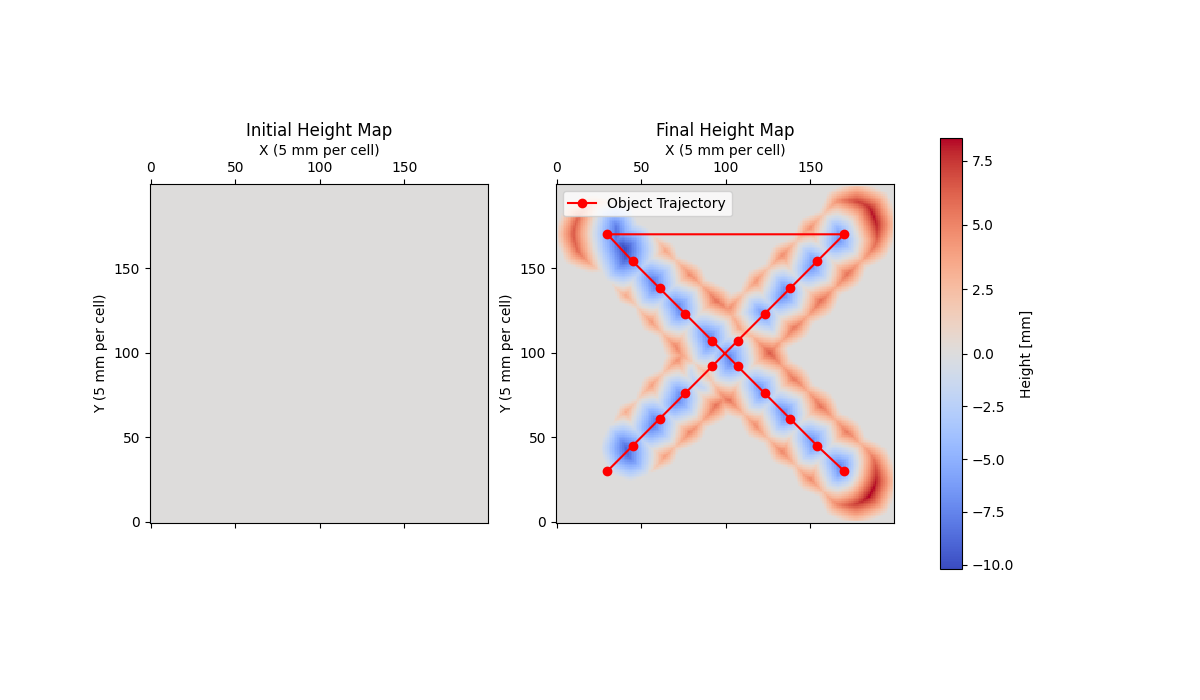

In [6]:
print(param)
plt.show()